In [59]:
import pandas as pd
import os
from datetime import datetime, date
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

#import warnings
#warnings.filterwarnings('ignore')

## Load Data

In [60]:
dir_ = "/home/reinhold/Daten/Paper_Datasets_Nov2022"
filenames = [r'OpenAPS complete_patient_statistics.xlsx',
    r'OPENonOH complete_patient_statistics.xlsx'] # Specify the file path

columns_ = ["gender", "age","height", "weight", "TOR<70", "TIR", "TOR>180", "bg_roc_stds"] # "dailyInsulinUnits", "dailyBasalInsulinUnits", "dailyCarbs" missing

df = {}
df["OpenAPS"] = pd.read_excel(os.path.join(dir_, filenames[0]))  # all columns
df["OpenAPS"] = df["OpenAPS"].loc[:, columns_]  

df["OPENonOH"] = pd.read_excel(os.path.join(dir_, filenames[1]))
print(len(df["OPENonOH"].columns), df["OPENonOH"].columns)
df["OPENonOH"] = df["OPENonOH"].loc[:, columns_]

27 Index([         'id',         'age',      'gender',      'height',
            'weight',     'country',        'year',       'month',
        'interdaysd',  'interdaycv', 'bg_roc_stds',      'TOR<70',
               'TIR',     'TOR>180',         'POR',     'J_index',
              'LGBI',        'HBGI',         'GMI',       'count',
              'mean',         'std',         'min',          0.25,
                 0.5,          0.75,         'max'],
      dtype='object')


In [61]:
#df["OpenAPS"].info()
#df.index = pd.to_datetime(df_raw["Timestamp"], format='%m/%d/%Y %H:%M:%S')

#df["OpenAPS"].head(2)
df["OpenAPS"].columns

Index(['gender', 'age', 'height', 'weight', 'TOR<70', 'TIR', 'TOR>180',
       'bg_roc_stds'],
      dtype='object')

In [62]:
df["OPENonOH"].info()
df["OPENonOH"].head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       75 non-null     object 
 1   age          66 non-null     float64
 2   height       66 non-null     float64
 3   weight       65 non-null     float64
 4   TOR<70       75 non-null     float64
 5   TIR          75 non-null     float64
 6   TOR>180      75 non-null     float64
 7   bg_roc_stds  75 non-null     float64
dtypes: float64(7), object(1)
memory usage: 4.8+ KB


,gender,age,height,weight,TOR<70,TIR,TOR>180,bg_roc_stds
0,Female,NaN,180.00,80.0,3.24,78.11,18.65,1.533459
1,Female,28.0,157.48,75.0,7.78,66.77,25.45,1.613297


## Figure 4: BG ROC STDS

0.606594198071824 2.68779125343826
0.756135904 2.289724938
0.61 2.85
[0.61 0.89 1.17 1.45 1.73 2.01 2.29 2.57]


Text(0, 0.5, 'count')

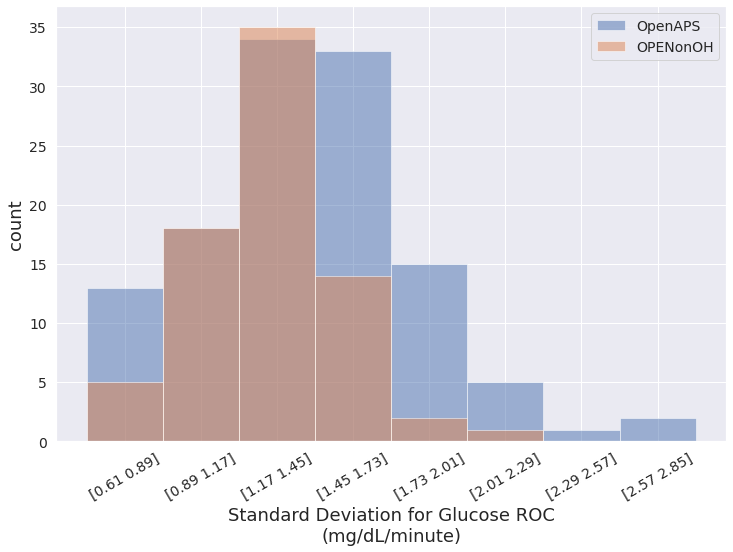

In [63]:
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)

print(min(df["OpenAPS"]["bg_roc_stds"]), max(df["OpenAPS"]["bg_roc_stds"]))
print(min(df["OPENonOH"]["bg_roc_stds"]), max(df["OPENonOH"]["bg_roc_stds"]))

# since min, max are positive, just add/subtract 1 %
min_ = 0.99*min(min(df["OpenAPS"]["bg_roc_stds"]), min(df["OPENonOH"]["bg_roc_stds"]))
max_ = 1.01*max(max(df["OpenAPS"]["bg_roc_stds"]), max(df["OPENonOH"]["bg_roc_stds"]))
min_, max_ = 0.61, 2.85

print(min_, max_)
print(np.arange(min_, max_, 0.28))
plt.figure(figsize=(12, 8))
plt.hist(df["OpenAPS"]["bg_roc_stds"], bins=np.linspace(min_, max_, 9), alpha=0.5, label='OpenAPS')
plt.hist(df["OPENonOH"]["bg_roc_stds"], bins=np.linspace(min_, max_, 9), alpha=0.5, label='OPENonOH')
lower_bin_edges = np.linspace(min_, max_, 9)[:-1]
upper_bin_edges = np.linspace(min_, max_, 9)[1:]

plt.legend(loc='upper right')
plt.xticks(ticks=lower_bin_edges + 0.28/2, labels=[f"[{l:0.2f} {u:0.2f}]" for l, u in zip(lower_bin_edges, upper_bin_edges)], rotation=30)
#x axis labels
plt.xlabel('Standard Deviation for Glucose ROC\n(mg/dL/minute)')
plt.ylabel("count")


#plt.tight_layout()

In [11]:
insulin_units_male = df.loc[df.gender == 'Male', 'dailyInsulinUnits']

male_insulin_qtiles = insulin_units_male.quantile([.25, .5, .75]).to_list()

print('The average units of insulin intake by males is {:.2f} units.'.format(
    insulin_units_male.mean()))

print('The median male insulin usage is {:.2f} units.'.format(
    male_insulin_qtiles[1]))

print('25% of males insulin intake is less than {:.2f} units.'.format(
    male_insulin_qtiles[0]))

print('25% of males insulin intake is more than {:.2f} units.'.format(
    male_insulin_qtiles[2]))

The average units of insulin intake by males is 45.58 units.
The median male insulin usage is 40.00 units.
25% of males insulin intake is less than 33.09 units.
25% of males insulin intake is more than 53.50 units.


In [12]:
insulin_units_female = df.loc[df.gender == 'Female', 'dailyInsulinUnits']

female_insulin_qtiles = insulin_units_female.quantile([.25, .5, .75]).to_list()

print('The average units of insulin intake by females is {:.2f} units.'.format(
    insulin_units_female.mean()))

print('The median female insulin usage is {:.2f} units.'.format(
    female_insulin_qtiles[1]))

print('25% of females insulin intake is less than {:.2f} units.'.format(
    female_insulin_qtiles[0]))

print('25% of females insulin intake is more than {:.2f} units.'.format(
    female_insulin_qtiles[2]))

The average units of insulin intake by females is 49.06 units.
The median female insulin usage is 36.85 units.
25% of females insulin intake is less than 33.98 units.
25% of females insulin intake is more than 51.33 units.


## Feature correlations and distributions
### Figure 2 a) correlation matrix (bottom left: OPENonOH, top right: OpenAPS)

age            0
height         0
weight         0
TOR<70         0
TIR            0
TOR>180        0
bg_roc_stds    0
dtype: int64
age            0
height         0
weight         0
TOR<70         0
TIR            0
TOR>180        0
bg_roc_stds    0
dtype: int64
[[ 1.          0.26536376  0.38413418  0.15972357 -0.01639356 -0.03450939
   0.02749895]
 [ 0.26536376  1.          0.49503989 -0.00494255 -0.15412476  0.14430718
   0.21657318]
 [ 0.38413418  0.49503989  1.          0.15899142 -0.10553175  0.04819533
   0.18201441]
 [ 0.15972357 -0.00494255  0.15899142  1.          0.07687624 -0.38248172
  -0.04302712]
 [-0.01639356 -0.15412476 -0.10553175  0.07687624  1.         -0.95063233
  -0.53124016]
 [-0.03450939  0.14430718  0.04819533 -0.38248172 -0.95063233  1.
   0.50566766]
 [ 0.02749895  0.21657318  0.18201441 -0.04302712 -0.53124016  0.50566766
   1.        ]] [[ 1.          0.17554509  0.05294952 -0.24917325  0.34892674 -0.2669838
  -0.25618894]
 [ 0.17554509  1.          0.443

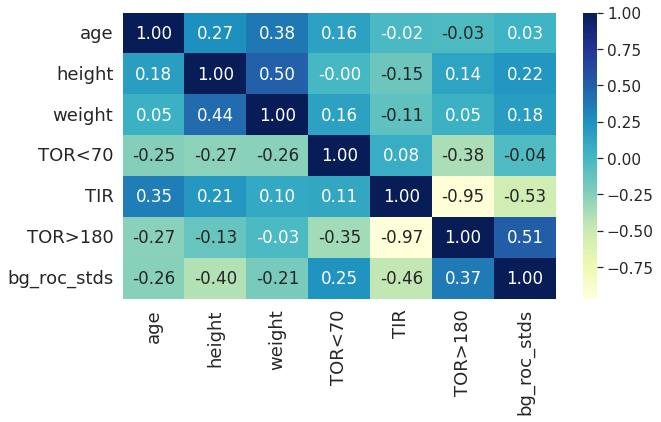

In [68]:
#dfcorr = df[[
#    'age', 'height', 'weight', 'dailyCarbs', 'dailyInsulinUnits',
#    'dailyBasalInsulinUnits'
#]]

columns_ = ["age","height", "weight", "TOR<70", "TIR", "TOR>180", "bg_roc_stds"]  # without "gender"

dfcorr = df["OpenAPS"].copy()[columns_]
dfcorr = dfcorr.dropna(axis=0)
print(dfcorr.isnull().sum())
mat = {}  # correlation matrices, that are to be combined into one
mat["OpenAPS"] = dfcorr.corr().to_numpy()

dfcorr2 = df["OPENonOH"].copy()[columns_]
dfcorr2 = dfcorr2.dropna(axis=0)
print(dfcorr2.isnull().sum())
mat["OPENonOH"] = dfcorr2.corr().to_numpy()

print(mat["OpenAPS"], mat["OPENonOH"])

# combine the two correlation matrices
 
mat["combined"] = mat["OpenAPS"] 
for i in range(mat["combined"].shape[0]):  # iterate over rows
    for j in range(mat["combined"].shape[1]):  # iterate over columns
        if i>j: 
            mat["combined"][i][j] = mat["OPENonOH"][i][j]
# bottom left triangle: OPENonOH
# top right triangle: OpenAPS

df_combined = pd.DataFrame(mat["combined"], columns=dfcorr.columns, index=dfcorr.columns)

sns.set(rc={'figure.figsize': (9.7, 5.27)})
sns.set(font_scale=1.4)
ax = sns.heatmap(df_combined, annot=True, fmt=".2f", cmap="YlGnBu")
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=18)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=18)
ax.tick_params(axis='x', rotation=90)

### Figure 2 b) box and rain plot

In [75]:
df1 = df["OpenAPS"][['gender', 'age', 'height', 'weight']]
df1["project"] = "OpenAPS"
df2 = df["OPENonOH"][['gender', 'age', 'height', 'weight']]
df2["project"] = "OPENonOH"
df_combined = pd.concat([df1, df2], axis=0)
df_combined.reindex(['project','gender', 'age', 'height', 'weight'], axis=1)

x = df_combined[['age', 'height', 'weight']].values  #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled)

df_scaled.columns = ['age', 'height', 'weight']


extracted_col = df_combined["gender"].to_numpy()
df_scaled.insert(0, "gender", extracted_col)
extracted_col = df_combined["project"].to_numpy()
df_scaled.insert(0, "project", extracted_col)

df = df_scaled

    gender   age    height      weight   project
0     Male  46.0  186.8424   73.000000   OpenAPS
1   Female  14.0  146.3040   49.000000   OpenAPS
2      NaN  41.0  167.6400  149.000000   OpenAPS
3     Male  35.0       NaN         NaN   OpenAPS
4     Male  42.0  182.8800  185.000000   OpenAPS
..     ...   ...       ...         ...       ...
70    Male   NaN       NaN         NaN  OPENonOH
71  Female  39.0  165.0000   68.000000  OPENonOH
72  Female  39.0  167.6400   81.646560  OPENonOH
73  Female  32.0  167.6400   58.966960  OPENonOH
74    Male  42.0  182.8800   80.739376  OPENonOH

[197 rows x 5 columns]
     gender       age    height    weight
0      Male  0.558442  0.844643  0.105263
1    Female  0.142857  0.607143  0.000000
2       NaN  0.493506  0.732143  0.438596
3      Male  0.415584       NaN       NaN
4      Male  0.506494  0.821429  0.596491
..      ...       ...       ...       ...
192    Male       NaN       NaN       NaN
193  Female  0.467532  0.716676  0.083333
194  Femal

### select combinations of projects, gender and vars

In [83]:
# fill dat variable
projects = ["OPENonOH", "OpenAPS"]
gender = ["Female", "Male"]
vars = ["age", "height", "weight"]

dat = {}
column_names = []
for var_ in vars:
    for project_ in projects:        
        for sex_ in gender:
            dat[(var_, sex_, project_)] = df.loc[(df.project == project_) & (df.gender == sex_), var_]
            column_names.append(f"{var_}_{sex_}_{project_}")


<AxesSubplot:>

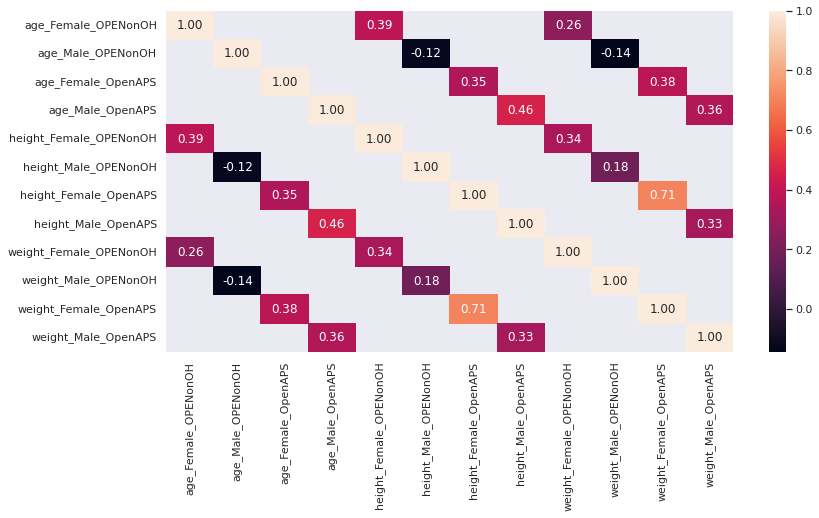

In [84]:
# feature correlations with respect to sex

df1 = pd.concat([dat[k] for k in dat.keys()], axis=1).head(122)

df1.columns = column_names

sns.heatmap(df1.corr(), annot=True, fmt=".2f")

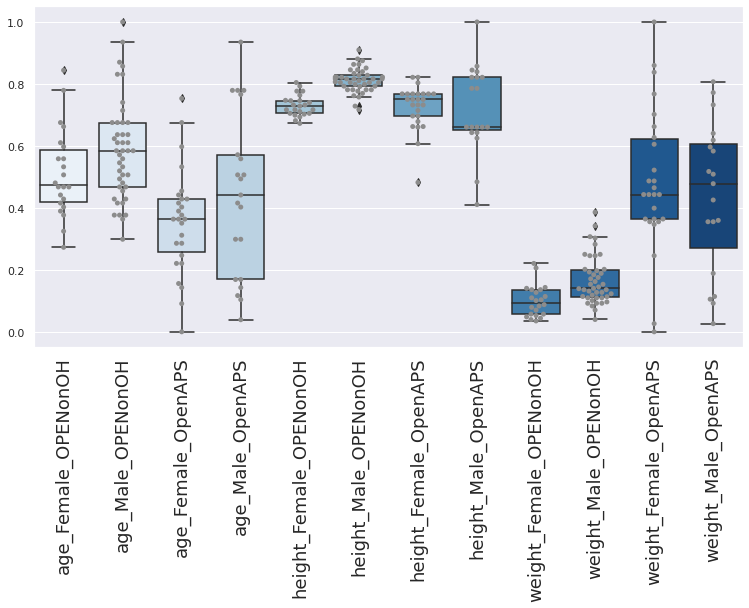

In [85]:
# distributions in age, height, weight across projects and gender
sns.set(rc={'figure.figsize':(12.7,6.27)})
ax = sns.swarmplot(data=df1, color=".55")
ax = sns.boxplot(data=df1, palette="Blues")

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)

ax.tick_params(axis='x', rotation=90)